In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['axes.grid'] = False
%matplotlib inline

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

In [2]:
valid = pd.read_csv('valid_preded_2.csv')

In [3]:
y_true = valid.toxic
y_pred = valid.pred

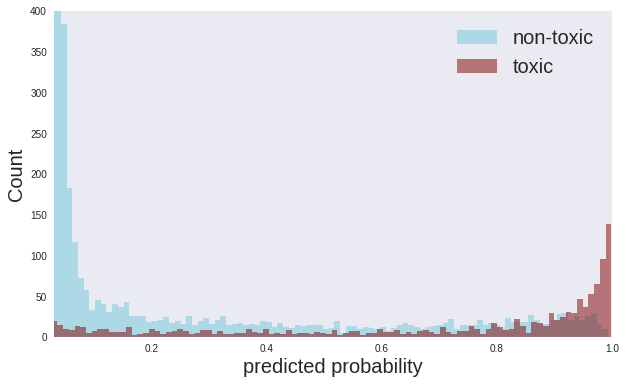

In [8]:
plt.rcParams.update({'font.size': 22})
auc_score = roc_auc_score(y_true, y_pred)
plt.figure(figsize=(10, 6))
plt.hist(y_pred[y_true == 0], bins=100, label="non-toxic", color='lightblue')
plt.hist(y_pred[y_true == 1], bins=100, alpha=0.5, label="toxic", color='maroon')
plt.xlabel("predicted probability", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xlim(0.03,1)
plt.ylim(0,400)
plt.legend(fontsize=20);

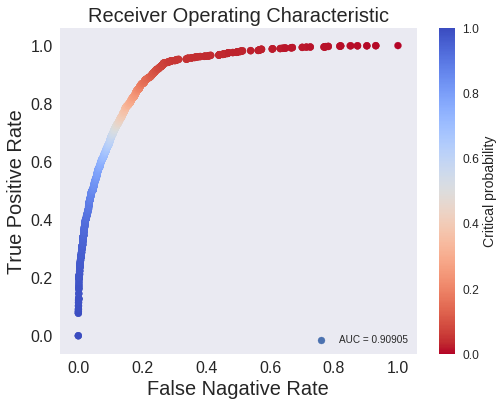

In [7]:
fpr, tpr, threshold = roc_curve(y_true, y_pred)
plt.figure(figsize=(8, 6))
cm = plt.cm.get_cmap('coolwarm_r')
plt.title('Receiver Operating Characteristic', fontsize=20)
sc = plt.scatter(fpr, tpr, c=threshold, cmap=cm, label = f'AUC = {auc_score:.5f}')
cb = plt.colorbar(sc)
cb.set_label(label='Critical probability', size=14)
plt.legend(loc = 'lower right')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.clim(0,1)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Nagative Rate', fontsize=20)
cb.ax.tick_params(labelsize=12)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()